# Tarea 3
__Curso:__ Aprendizaje Automático 2020 

__Programa:__ MIIIO/DIIIO/DISC

__Profesor:__ Gonzalo Ruz

__Ayudante:__ Anthony Cho

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea3_Milo_ Rozental.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 2 de octubre, 23:55 hrs.

In [1]:
%matplotlib inline

## activacion del estilo de ambiente de graficación
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, LabelBinarizer  #para pasar categoricas a int para el arbol de decision
from sklearn.model_selection import train_test_split


## Metricas
from sklearn.metrics import classification_report, plot_confusion_matrix

## Modelos
from sklearn.tree import DecisionTreeClassifier

## Graficacion de un arbol
from sklearn.tree import plot_tree

from numpy import arange

In [2]:
# Global imports and settings
from preamble import *
import keras
#print("Using Keras",keras.__version__)
%matplotlib inline
plt.rcParams['figure.dpi'] = 125 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

#### Disclaimer:
Cabe mencionar que todos los resultados de los diferentes modelos varian (levemente) cada vez que se ejecutan, por lo que el analsis se hizo en funcion de un determinado output. 

## Pregunta 1
En la clase 7 vimos un ejemplo usando el dataset MNIST, donde la red neuronal logró un
accuracy entre 97%-98%. Utilizando la partición dada para este dataset (`X_train` y
`X_test` y sus respectivas etiquetas) entrene usando `X_train` un clasificador
naive Bayes y un árbol de decisión, no olvide de entregar el árbol resultante. Una vez entrenado los
modelos, evalúe en el conjunto de `X_test` el accuracy de ambos modelos. Se logra
niveles de accuracy parecidos a lo obtenido por la red neuronal de Keras? Justifique su
respuesta.

### Respuesta:

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
#Realizar los sets y ademas pasar a 2d.
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
#Usamos el arbol con paremetros default:
model = DecisionTreeClassifier().fit(X=X_train, y=y_train)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.87      0.88       982
           5       0.83      0.82      0.83       892
           6       0.90      0.89      0.90       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.82      0.82       974
           9       0.84      0.86      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



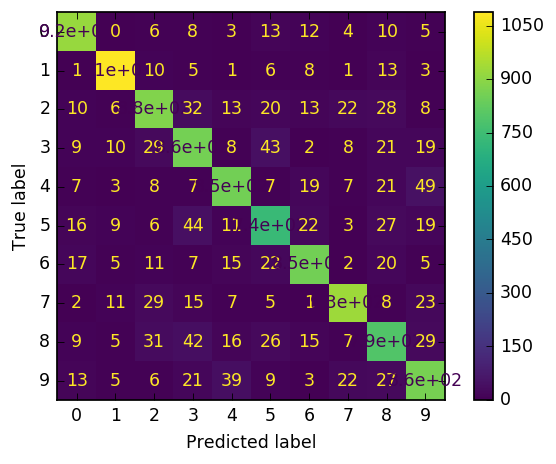

In [9]:
## Reporte de predicciones
prediccion = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=prediccion))

# Grafica de matriz de confusion
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [10]:
## Grafica del arbol

plt.figure(figsize=(40, 24), dpi=300)
plot_tree(decision_tree=model, max_depth=7,#fijamos el max_depth al momento de hacer el grafico para que este sea mas ameno a la vista
          fontsize=8, filled=True);
plt.savefig('Classification_tree.png', bbox_inches='tight')

### Justificacion:
Podemos ver como el accuracy al usar un Tree Clf, disminuye aproximadamente en 10%, puesto a que se obtiene un valor de 88% en comparacion con el 97%-98% obtenido por la red neural vista en clases.

A pesar de reducir su desempeño se puede apreciar por medio de la matriz de confusion que el modelo igualemente se comporta de manera deseada, debido a que se observa como la mayoria de los datos se encuentran en la diagonal correcta.

Se cree que esta disminucion en el matrica analizada es producto del tipo de informacion que existe en el problema, ya que en este caso son datos con informacion en tres dimensiones (imagenes), pero este tipo de dato no puede ser manejado por el Decision Tree Classifier, por lo que para que pudiera comprendarlas estas deberion ser reducidas a dos dimensiones. 
Además a este problema hay que agregarle la forma en que funciona este clasificador, esta se expone en la grafica (adjuntanda como DTC_Final.png), donde se aprecia que hay un elemento el cual es considerado como el "más diferenciador", en este caso es el arreglo en la posicion 350, no obstante como estas son imagenes de numeros hechos a "mano", talvez ese elemento diferenciador no se repita para cada uno de los casos, puesto a que es normal que cada persona escriba de su propia manera un numero en particular, es asi como el clasificador podria tener problemas para identificar correctamente los numeros 8, ya que como vemos es para esta clase que se obtiene la peor precision.

Es asi como se establece que los problemas mencionados previamente, es decir que este clasificador no pueda recibir el input de manera apropiada como lo hace una red neural Keras, generan un impacto negativo que se refleja por medio del accuracy obtenido.

Igualmente cabe mencionar que se ha utilizado un Decision Tree Classifier default, por lo cual este margen con respecto a la red neural de Keras, podria ser reducido en gran medida si es que se hace una busqueda de los mejores parametros.

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



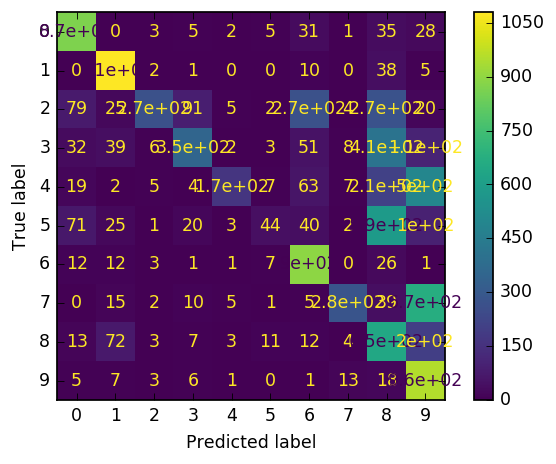

In [11]:
#Ahora Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Probamos Naive Bayes completamente default
## Ajuste del modelo
model = GaussianNB().fit(X_train, y_train)

## Prediccion con test data
prediccion = model.predict(X_test)

## Reporte de metricas
print(classification_report(y_pred=prediccion, y_true=y_test))

## Matriz de confusion
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

### Justificacion:
Para el caso del clasificador Naive Bayes el escenario empeora, esto debido a que alcanza un accuracy de 56%, lo cual esta cercano a que una mitad de las veces se equivoca. En otras palabras es un 42% peor que el modelo original y un 32% que el Decision Tree Classifier.

Por medio de la matriz de confusion se puede notar cuales son las clases que tienen mas problemas para ser clasificadas correctacmente, nuevamente ocurre que el numero 8 es el peor clasificado, ya que se nota como existen muchas ocasiones donde es clasificado como 8, pero realmente son los numeros 5,3,2,4. En adición ahora existen problemas para clasificar el numero 9, ya que se clasifica como 9 en reiteradas ocasiones a los numeros 7,4,8. Esto se visualiza por medio del classification report donde se observa como la precision para la clase 8 es de 0.28, y para la clase 9 es de 0.37.

Igualmente cabe mencionar que se ha utilizado un Naive Bayes default, por lo cual este margen con respecto a la red neural de Keras, podria ser reducido en gran medida si es que se hace una busqueda de los mejores parametros.

##### Conclusion final:
Es asi como se establece que ambos clasificadores observados ( de manera defualt), obtienen peores resultados que la red neural de Keras, y como se explico en la primera justificacion se infiere que esto se debe al tipo de informacion que se posee para realizar la prediccion la cual esta en tres dimensiones, siendo esta no la más adecuada para este tipo de clasificadores, generando asi conflictos para la identificacion de ciertos numeros en particular.

## Pregunta 2
En la clase 8 vimos un ejemplo de clasificación binaria usando el dataset de reviews de
películas IMDB. Considere explorar las siguientes alternativas para ver si logra alguna
mejora:
* a. En clases probamos con dos y tres capas ocultas. Intente usar una o cuatro capas ocultas y vea
cómo afecta la validación y el accuracy de la prueba.
* b. Intente usar capas con más unidades ocultas o menos unidades ocultas: 8 unidades,32
unidades, 64 unidades, 128 unidades, y 256 unidades.
* c. Intente usar la función de pérdida **mse** en lugar de **binary_crossentropy**.
* d. Intente usar la activación **tanh** (una activación que era popular en los inicios de las
redes neuronales) en lugar de **relu**.

Para cada una de las letras anteriores, comente sus resultados.

### Respuesta

Tomamos el codigo exactamente como lo vimos en clases

In [47]:
import keras
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [48]:
#Modelo original visto en la clase 8. Con 2 capas ocultas y 16 unidades cada una.
from keras import models
from keras import layers 
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512, verbose=0,
                                   validation_data=(x_test, y_test))

In [49]:
result = original_model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

782/782 [==============================] - 1s 889us/step - loss: 0.7923 - acc: 0.8497
Loss: 0.7923, Accuracy:  0.8497


In [50]:
#Usamos la funcion para visualizar las metricas implementada por Anthony C. (Ayudante), en la ayudantia 7.
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

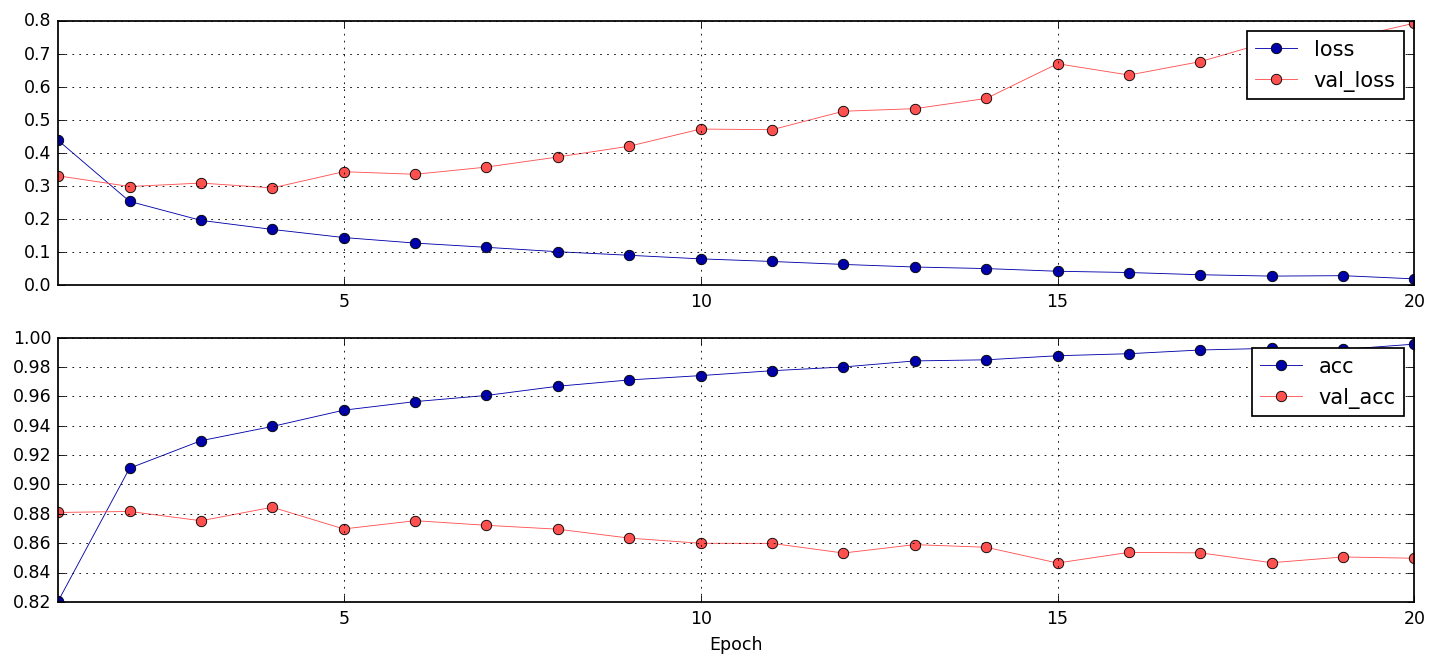

In [51]:
plot_history(original_hist, width=14)

### Resultados originales:
Para la base de la comparacion se usaran los resultados obtenidos a traves del modelo original, los cuales son Loss: 0.7923, Accuracy:  0.8497

### A:

In [52]:
#Probemos con 4 capas ocultas.
a_model = models.Sequential()
a_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
a_model.add(layers.Dense(16, activation='relu'))
a_model.add(layers.Dense(16, activation='relu'))
a_model.add(layers.Dense(16, activation='relu'))
a_model.add(layers.Dense(1, activation='sigmoid'))

a_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
a_model_hist = a_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512, verbose=0,
                                       validation_data=(x_test, y_test))

In [53]:
result = a_model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

782/782 [==============================] - 1s 917us/step - loss: 1.0211 - acc: 0.8495
Loss: 1.0211, Accuracy:  0.8495


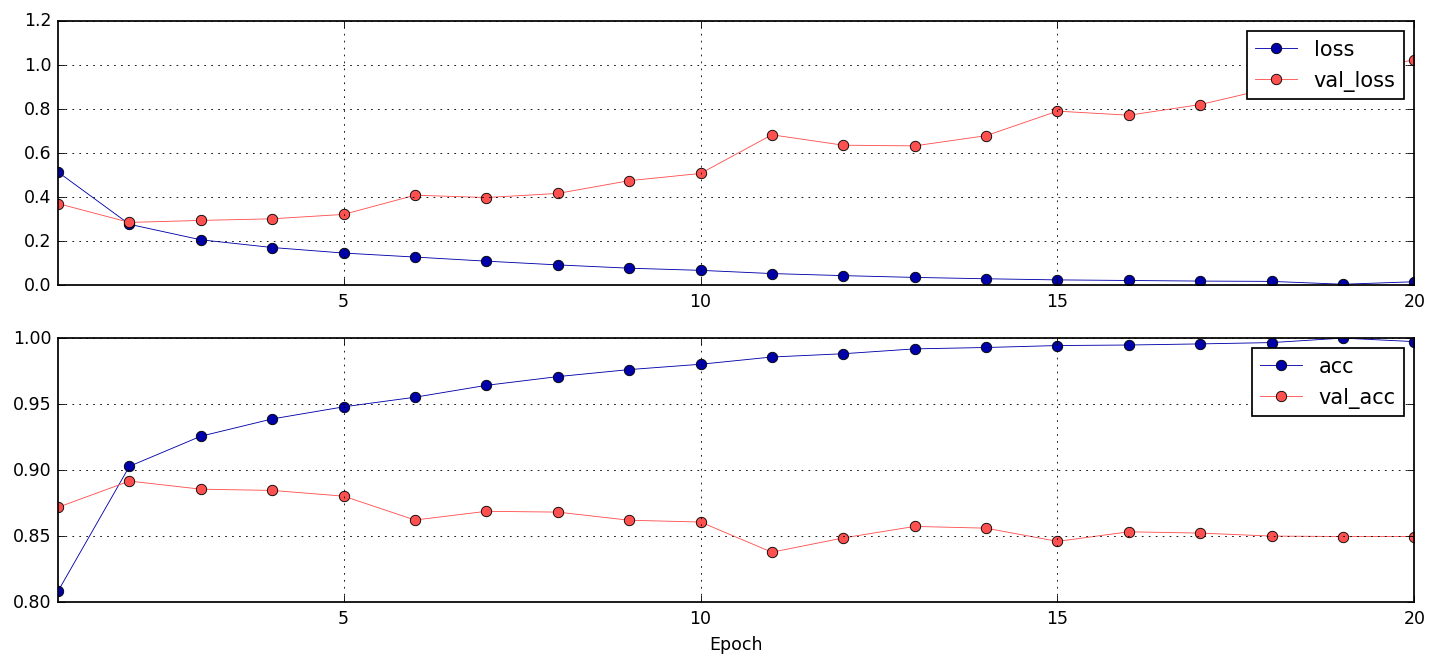

In [54]:
plot_history(a_model_hist, width=14)

In [55]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
a_model_val_loss = a_model_hist.history['val_loss']
original_val_acc = original_hist.history['val_acc']
a_model_val_acc = a_model_hist.history['val_acc']

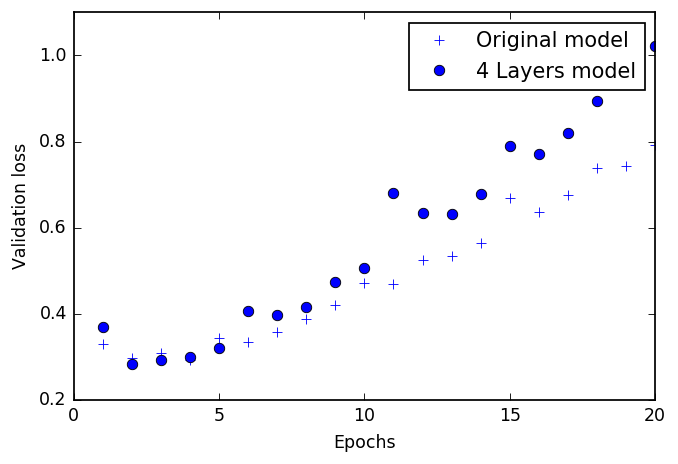

In [56]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, a_model_val_loss, 'bo', label='4 Layers model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

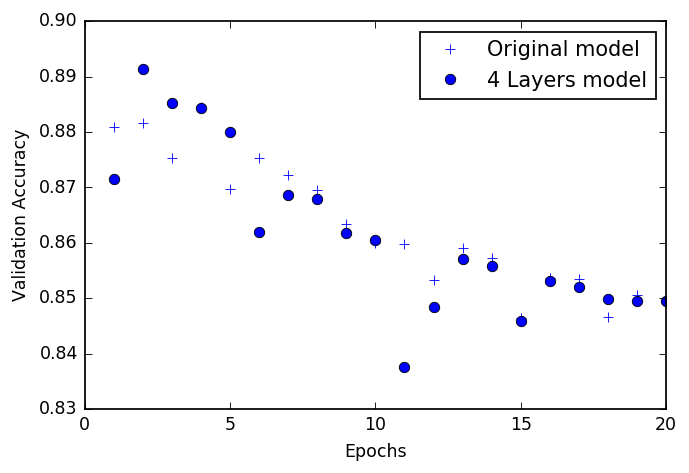

In [57]:
plt.clf()
plt.plot(epochs, original_val_acc, 'b+', label='Original model')
plt.plot(epochs, a_model_val_acc, 'bo', label='4 Layers model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

## Justificacion
En primer lugar notemos que dejamos el modelo tal cual como lo vimos en clase (por lo que no se hace un validation split, ya que este no se hizo en clases). Rapidamente podemos notar que 20 epocas sobre pasan la cantidad de epocas necesarias para este modelo, puesto a que tanto en el original como en el con 4 capas ocultas observamos un sobre ajuste. 

Cabe destacar que este hecho de epocas "extras" afectará a lo largo de todo el desarrollo de los diferentes variantes del modelo y sus comparaciones durante el desarrollo de la pregunta 2, es por ello que solo se mencionará en esta justificación dejando claro su impacto.

Este sobre ajuste afecta particularamente a la validacion de la accuracy desde la epoca 3 y 4, para el caso con 4 cuatro capas y original respectivamente, ya que como observamos en los diferentes graficos de accuracy, desde esas epocas en adelante existe un empeoramiento en el desempeño del modelo.

Asi mismo continuando en el analisis de esta metrica, se infiere que una cuarta capa oculta con la misma cantidad de unidades ocultas no genera un aporte, debido a que como podemos ver al evaluar el modelo original, este obtiene una acc: 0.8497 y un loss: 0.7923, donde por otro lado el "a_model" alcanza valores de acc: 0.8495 y un loss: 1.0211, es decir emperora en un 0.02% el accuracy. Esta poca diferencia se observa en el ultimo grafico expuesto, ya que se nota como en las primeras epocas el modelo con 4 capas tiene un mejor desempeño, pero esto se ve compensando por su desempeño entre las epocas 10-15.

De igual forma al observar la metrica "loss" (extra para esta pregunta), se visualiza como esta aumenta en 0.2288. Considerando que esta tasa muestra a traves de un valor escalar, que tan cerca esta nuestro modelo al momento de predecir, el hecho de que este valor aumente significa que nuestro modelo empeora con respecto al original.

Luego generar este cambio no es recomendable para el modelo.

### B:

782/782 [==============================] - 1s 917us/step - loss: 0.5844 - acc: 0.8545
Cantidad de unidades ocultas: 8
Loss: 0.5844, Accuracy:  0.8545
782/782 [==============================] - 1s 1ms/step - loss: 0.9467 - acc: 0.8545
Cantidad de unidades ocultas: 32
Loss: 0.9467, Accuracy:  0.8545
782/782 [==============================] - 1s 1ms/step - loss: 1.1866 - acc: 0.8573
Cantidad de unidades ocultas: 64
Loss: 1.1866, Accuracy:  0.8573
782/782 [==============================] - 1s 1ms/step - loss: 1.2227 - acc: 0.8657
Cantidad de unidades ocultas: 128
Loss: 1.2227, Accuracy:  0.8657
782/782 [==============================] - 2s 2ms/step - loss: 1.6062 - acc: 0.8716
Cantidad de unidades ocultas: 256
Loss: 1.6062, Accuracy:  0.8716


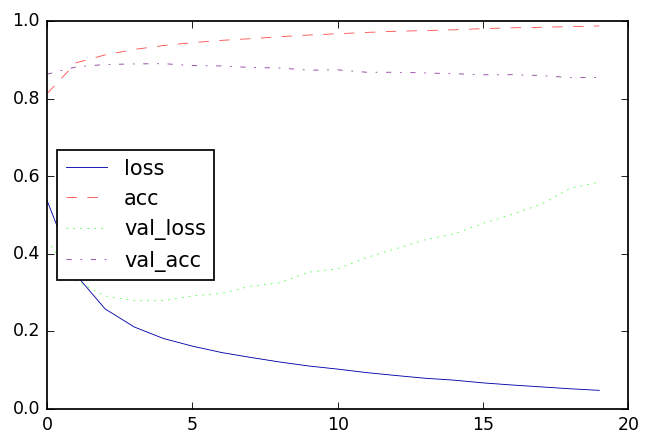

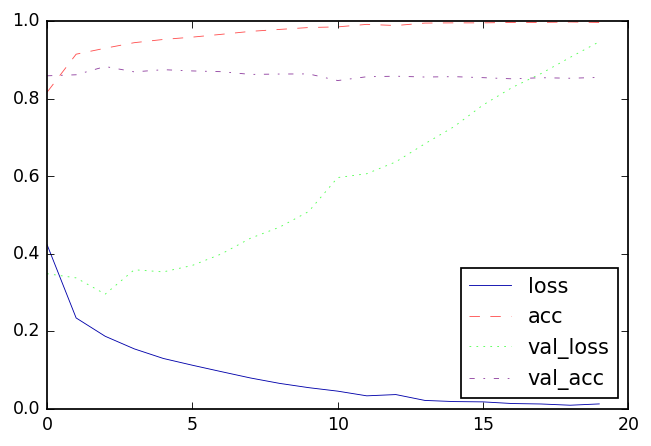

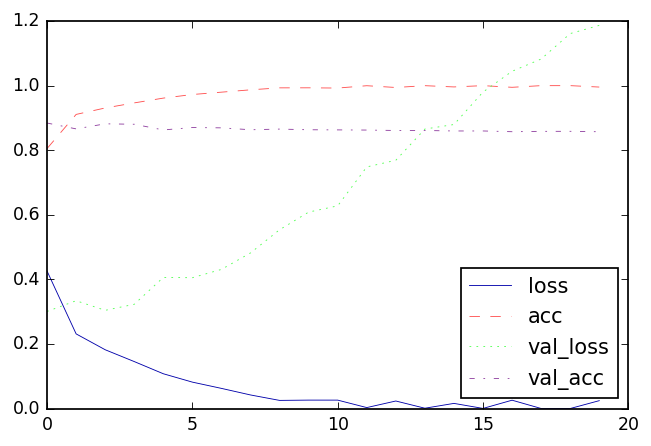

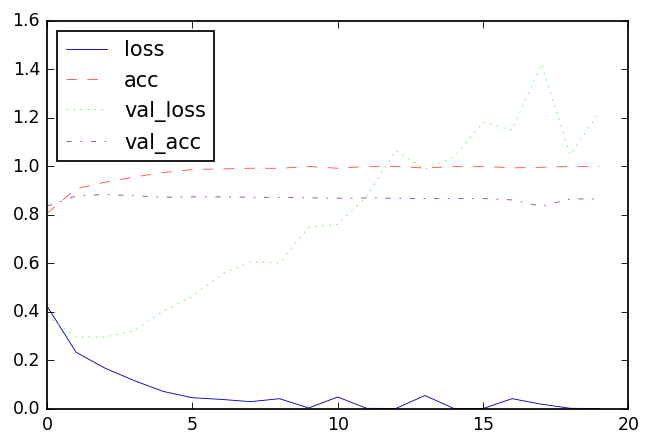

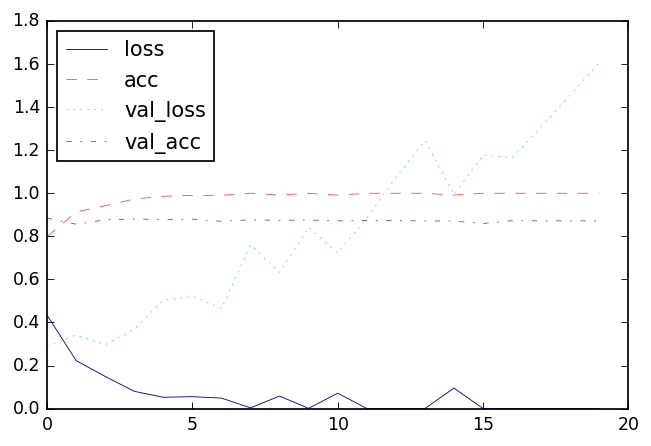

In [58]:
#Probemos con 2 capas ocultas (original) y  [8,32,64,128,256] unidades ocultas.
aux=[8,32,64,128,256]
for i in aux:
    a_model = models.Sequential()
    a_model.add(layers.Dense(i, activation='relu', input_shape=(10000,)))
    a_model.add(layers.Dense(i, activation='relu'))
    a_model.add(layers.Dense(1, activation='sigmoid'))

    a_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])
    a_model_hist = a_model.fit(x_train, y_train, epochs=20, batch_size=512, verbose=0, validation_data=(x_test, y_test))
    result = a_model.evaluate(x_test, y_test)
    print("Cantidad de unidades ocultas:", i)
    print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))
    pd.DataFrame(a_model_hist.history).plot();

### Justificacion 
Como se puede observar se realizo un ciclo for para obtener los resultados con 8,32,64,128 y 256 unidades ocultas, manteniendo las 2 capas ocultas. En el output se puede apreciar rapidamente que la accuracy mejora para cualquiera de los escenarios propuestos, debido a que todos alcanzan puntajes mayores que 0.8497. Asi mismo variando la cantidad de unidades ocultas, vemos por medio de los graficos (linea celeste), que los valores se mantienen entre el ~85% y ~87%. Siendo asi como se puede observar que existe un constante aumento desde 8-32 unidades hacia arriba, llegando al mayor valor de accuracy alcanzando por el modelo con 87.16% con 256 unidades ocultas por capa, lo cual es una mejora de 2.19% con respecto al modelo original.

Por el lado de la metrica de loss, vemos como esta crece con respecto al aumento de unidades ocultas. En primer lugar para 8 unidades es menor que el caso original (0.7923), siendo 0.5844. Para el resto de unidades ocultas existe un cremiento con respecto al anterior numero de unidades ocultas, hasta llegar a las 256, donde observamos un valor de 1.6062, es decir un aumento de 0.8139, comparando con el modelo original, sin embargo hay que recordar quea pesar de mostrar un peor valor en la funcion de perdida existe un aumento considerable en la metrica de interes, por lo que se condisera aceptable.

Es asi como se concluye que cambiar la cantidad de unidades ocultas por capa a 256 generaria una mejora en el desempeño del modelo.

### C

In [59]:
#Probemos con 2 capas ocultas (original) y la función de pérdida mse en lugar de binary_crossentropy.
a_model = models.Sequential()
a_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
a_model.add(layers.Dense(16, activation='relu'))
a_model.add(layers.Dense(1, activation='sigmoid'))

a_model.compile(optimizer='rmsprop',
                      loss='mse',
                      metrics=['acc'])
a_model_hist = a_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512, verbose=0,
                                       validation_data=(x_test, y_test))
result = a_model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

782/782 [==============================] - 1s 845us/step - loss: 0.1192 - acc: 0.8574
Loss: 0.1192, Accuracy:  0.8574


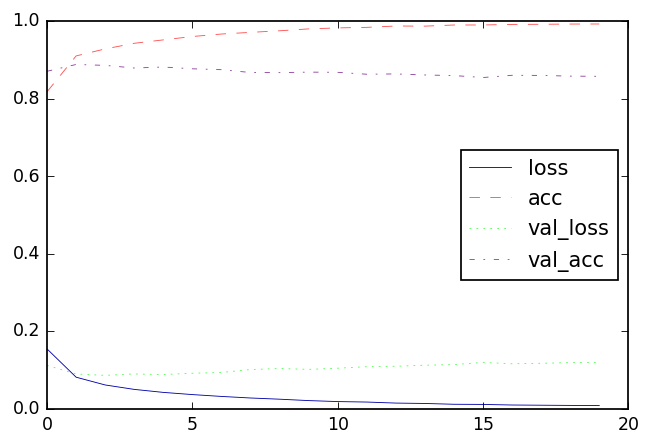

In [60]:
pd.DataFrame(a_model_hist.history).plot();

### Justificacion
Vemos como al utilizar la funcion de perdida mse en lugar de binary_crossentropy, la accuracy del modelo aumenta, particularmente en 0.77%. Si bien es una leve mejoria, para el caso de la funcion de perdida vemos como esta otorga un valor mucho más cercano a 0, siendo una reduccion de 0.6731, por lo que esta variente del modelo esta prediciendo de mejor manera.

Por lo anterior, es que se infiere que este es cambio en la metrica para la funcion de perdida, es positivo para el modelo original, ya que entrega mejores resultados. De igual forma se deduce que esta mejoria se debe a que si bien binary_crossentropy es ideal para casos donde se busca una respuesta binaria, en este caso si la review es buena o mala, mse posee su potencial en las regresiones, por lo que se cree que esta medida de perdida, logra manejar de mejor manera cada una de las palabras que componen la review, para saber cuales de ellas afectan en mayor medida al outcome, en otras palabras comprende mejor cuales palabras son determinantes para clasificar la review como buena o mala.

### D

In [61]:
##Probemos con 2 capas ocultas (original) y activación tanh en lugar de relu.
a_model = models.Sequential()
a_model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
a_model.add(layers.Dense(16, activation='tanh'))
a_model.add(layers.Dense(1, activation='sigmoid'))

a_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
a_model_hist = a_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512, verbose=0,
                                       validation_data=(x_test, y_test))
result = a_model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

782/782 [==============================] - 1s 1ms/step - loss: 0.8134 - acc: 0.8388
Loss: 0.8134, Accuracy:  0.8388


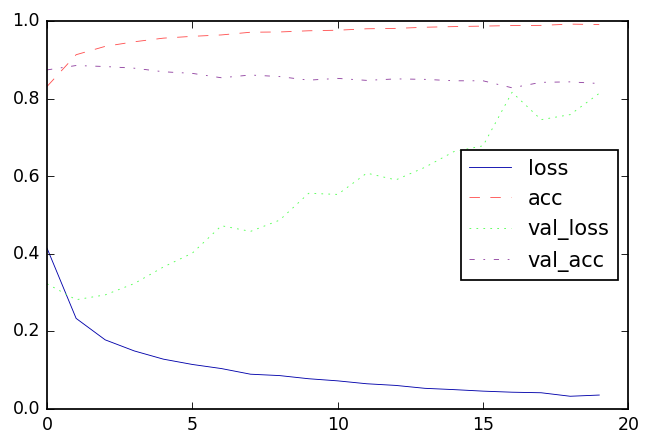

In [62]:
pd.DataFrame(a_model_hist.history).plot();

### Justifricacion
Al generar el cambio en la activación usando tanh en lugar de relu, podemos observar que el modelo empeora, teniendo un accuracy de 83.88%, es decir una disminucion de 1.09%. Y en el caso de la funcion de perdida se obtiene el valor de 0.8134, es decir aumenta en 0.0211, por lo que las predicciones del modelo empeoran igualmente.

Este empeoramiento en la funcion de perdida se observa en la grafica expuesta, donde se nota como la linea punteada verde (Val_loss) ya desde las primeras epocas comienza a empeorar, lo cual continua a lo largo del resto de epocas.

 Es asi como se concluye que este cambio en la funcion de activacion empeora el modelo original que utiliza relu.

## Pregunta 3
En la clase 8 vimos un ejemplo de clasificación multi-clase usando el Reuters dataset. Considere explorar las siguientes alternativas para ver si logra alguna
mejora:
* a. En clases probamos con dos capas ocultas. Intente usar una o tres capas ocultas y vea cómo afecta la validación y el accuracy de la prueba.
* b. Intente usar capas con más unidades ocultas o menos unidades ocultas: 8 unidades,32 unidades, 128 unidades, y 256 unidades.

Para cada una de las letras anteriores, comente sus resultados.

### Respuesta

Cabe mencionar que se utilizara el modelo con 8 epocas, debido a que como lo mencionó el profesor en clases este es un valor adecuado para dicho parametro.

In [28]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [36]:
from keras.utils.np_utils import to_categorical
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [37]:
from keras import models
from keras import layers 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
x_val, partial_x_train = x_train[:1000], x_train[1000:]
y_val, partial_y_train = one_hot_train_labels[:1000], one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8, verbose=0,
                    batch_size=512,
                    validation_data=(x_val, y_val))

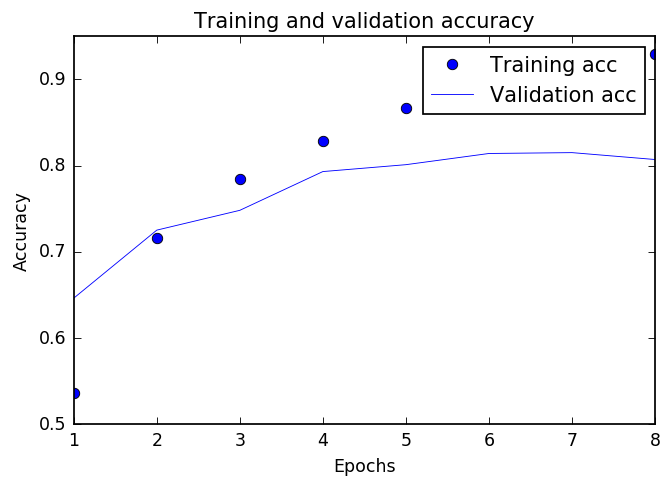

In [39]:
plt.clf()   # clear figure
epochs = range(1, 9)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
result = model.evaluate(x_test, one_hot_test_labels)
print("Loss: {:.4f}, Accuracy: {:.4f}".format(*result))

71/71 [==============================] - 0s 1ms/step - loss: 0.9651 - accuracy: 0.7850
Loss: 0.9651, Accuracy: 0.7850


## Resultados Originales:
Hasta aqui todo el codigo corresponde a lo expuesto en la clase 8. Como podemos observar se alcanza un loss de 0.9651 y un accuracy de 0.7850. Estos seran los valores que se usaran como base para la comparacion.

###  A:

In [41]:
#Probemos ahora con 3 capas ocultas
mod_model = models.Sequential()
mod_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
mod_model.add(layers.Dense(64, activation='relu'))
mod_model.add(layers.Dense(64, activation='relu'))
mod_model.add(layers.Dense(46, activation='softmax'))
mod_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
mod_history = mod_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8, verbose=0,
                    batch_size=512,
                    validation_data=(x_val, y_val))

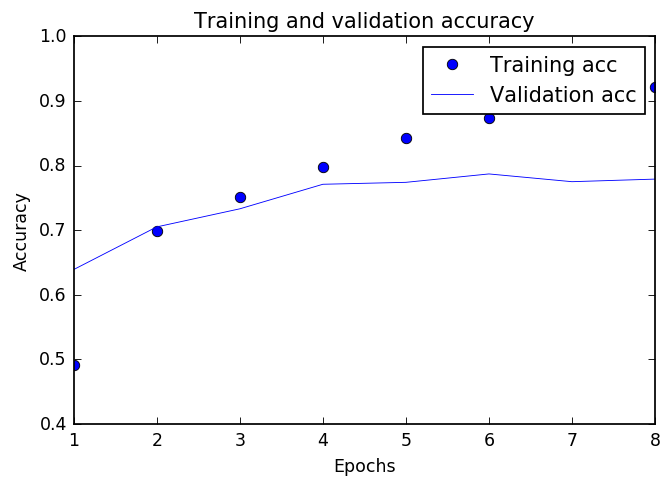

In [43]:
plt.clf()   # clear figure
epochs = range(1, 9)
acc = mod_history.history['accuracy']
val_acc = mod_history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
result = mod_model.evaluate(x_test, one_hot_test_labels)
print("Loss: {:.4f}, Accuracy: {:.4f}".format(*result))

71/71 [==============================] - 0s 1ms/step - loss: 1.1853 - accuracy: 0.7422
Loss: 1.1853, Accuracy: 0.7422


### Justificacion:
Al agregar una nueva capa oculta con 64 unidades ocultas, podemos notar que el accuracy empeoro especificamente en un 4.28% con respecto al modelo original. 

Asi mismo al comparar ambos graficos podemos notar que pareciera que la curva de la validation accuracy se comporta de manera similar, ya que en ambos casos alcanza su maximo en la epoca 6, para luego empeorar, sin embargo para el caso del modelo "modificado", la curva llega un máximo menor que en el caso original. 

Por el lado de la funcion de perdida vemos que existe un aumento de 0.2202 en el valor obtenido, lo cual significa que esta modificacion en el modelo afecta negativamente que tan bien predice.

Tras lo expuesto previamente es que se infiere que no entrega beneficio agregar una nueva capa oculta con la misma cantidad de unidades ocultas al modelo, debido a que empeora el outcome al momento de evaluarlo y a su vez es un aumento en el gasto computacional.

### B:

71/71 [==============================] - 0s 997us/step - loss: 1.6785 - accuracy: 0.6140
Cantidad de unidades ocultas: 8
Loss: 1.6785, Accuracy: 0.6140


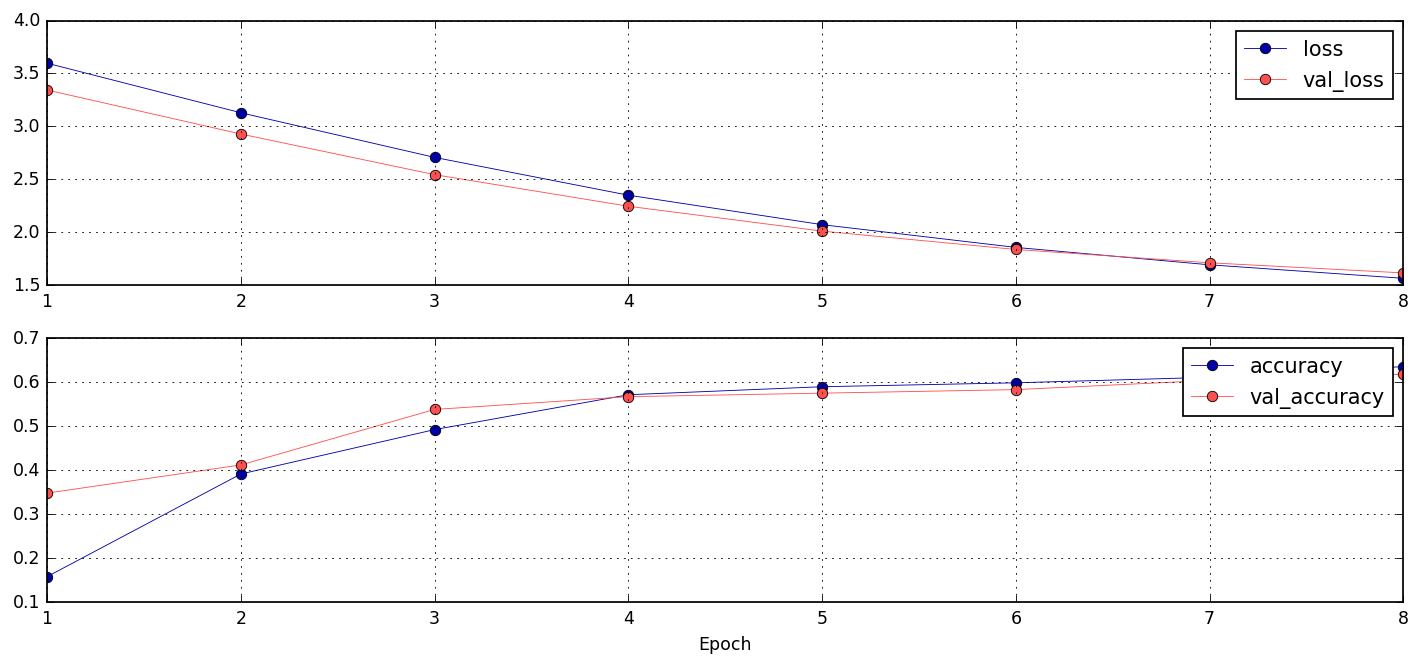

71/71 [==============================] - 0s 1ms/step - loss: 1.1019 - accuracy: 0.7556
Cantidad de unidades ocultas: 32
Loss: 1.1019, Accuracy: 0.7556


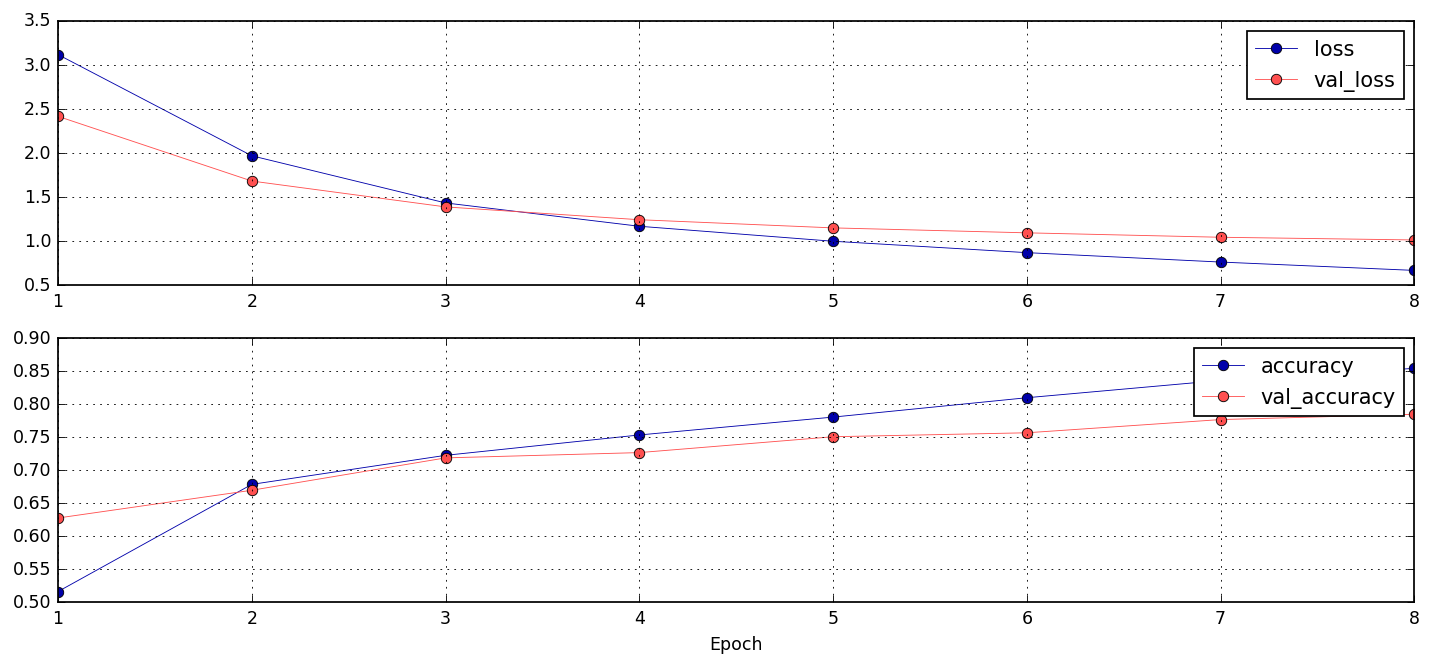

71/71 [==============================] - 0s 1ms/step - loss: 0.9980 - accuracy: 0.7965
Cantidad de unidades ocultas: 128
Loss: 0.9980, Accuracy: 0.7965


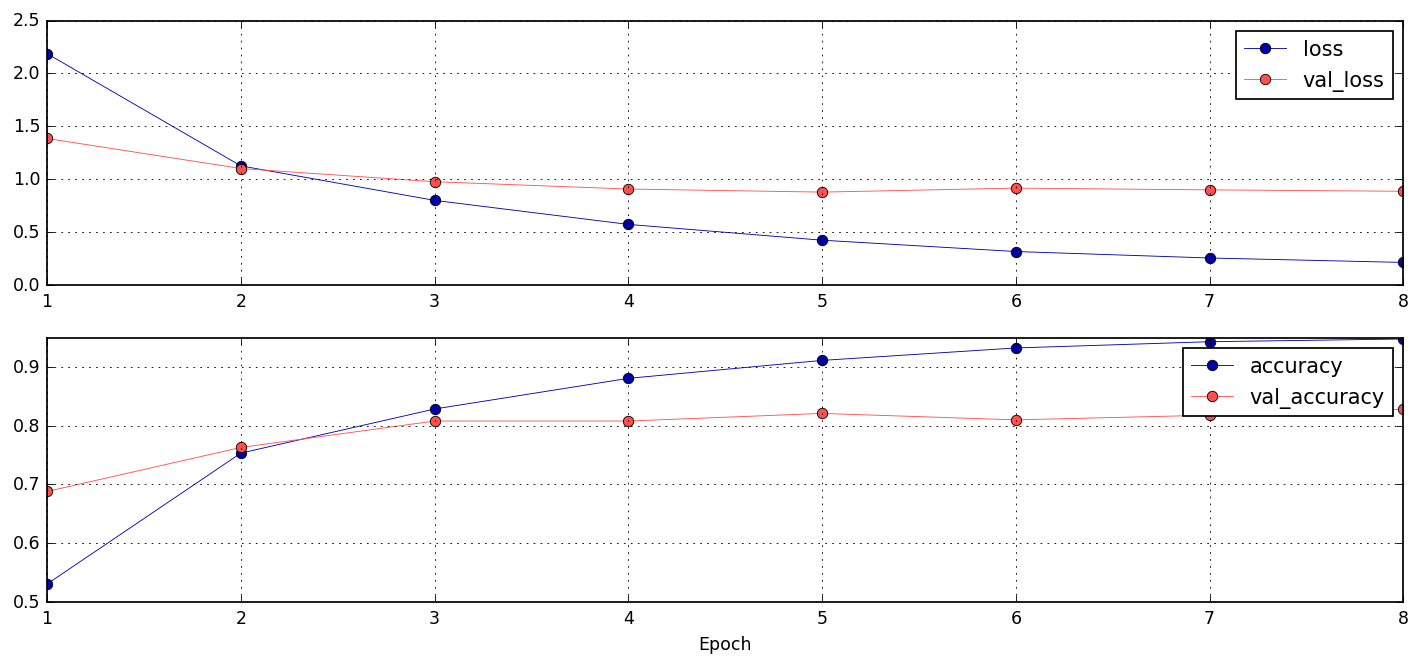

71/71 [==============================] - 0s 2ms/step - loss: 1.0582 - accuracy: 0.7947
Cantidad de unidades ocultas: 256
Loss: 1.0582, Accuracy: 0.7947


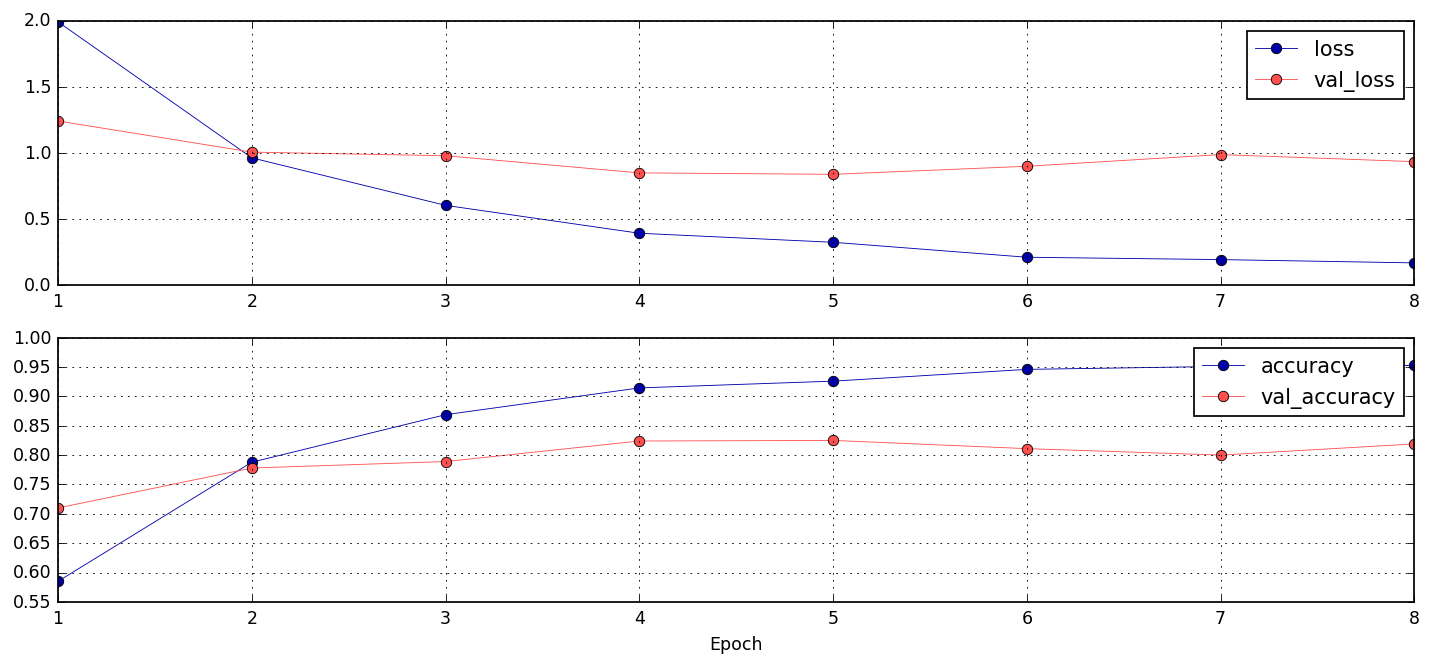

In [45]:
#Probemos ahora con 2 capas ocultas (original), pero variamos la cantidad de unidades ocultas
aux=[8,32,128,256]
for i in aux:
    mod_model = models.Sequential()
    mod_model.add(layers.Dense(i, activation='relu', input_shape=(10000,)))
    mod_model.add(layers.Dense(i, activation='relu'))
    mod_model.add(layers.Dense(46, activation='softmax'))
    mod_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    mod_history = mod_model.fit(partial_x_train,
                        partial_y_train,
                        epochs=8, verbose=0,
                        batch_size=512,
                        validation_data=(x_val, y_val))
    result = mod_model.evaluate(x_test, one_hot_test_labels)
    print("Cantidad de unidades ocultas:", i)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(*result))
    #obtenemos los graficos para visualizar los resultados, tanto de la accuracy como del loss para cada variacion.
    plot_history(mod_history, width=14)

### Justificacion:
Al visualizar los distintos casos de outcome al variar la cantidad de unidades ocultas por capa, se notifica que para los casos de 8 y 32 unidades no es favorable realizar la modifacion, pues el accuracy se ve afectado negativamente. Es por ello que nos quedamos con la opcion 128 y 256 unidades, debido a que estas son las unicas opciones donde el accuracy del modelo se ve mejorado. La mejor opcion es la de 128 unidades ocultas por capa, debido a que alcanza un valor de 79.65% de accuracy, superando por 0.18% al caso con 256 unidades ocultas por capa, y por un 1.15% al caso original. Sin embargo este 1.15% de mejoria tiene un costo, el cual se ve reflejado en el aumento del valor de la funcion de perdida, la cual incrementa en 0.0329, si bien este esto refleja que al modelo le cuesta mas predecir correctamente, se cree que este costo es aceptable dado al aumento que representa en la metrica de interes (accuracy). 

Centrandose en la visualizacion de los resultados, podemos ver que nuevamente ocurre que para el validation accuracy ocurre que en la opcion con 128 unidades por capa, alcanza antes un estado de "estabilidad", particularmente en la epoca 3. En cambio para el caso del modelo original, vemos como es un constante aumento hasta la epoca 7. 

Por otro lado en el caso del validation loss del modelo con 128 unidades, vemos como este alcanza su mejor valor en la epoca 4, valor que logra mantener durante el resto de las epocas.

Es asi como se concluye que existe una mejora en el rendimiento del modelo si es que se opta por tener 128 unidades ocultas por capa oculta en lugar de 64, ya que produce un aumento en la metrica de interes a cambio de un pequeño empeoramiento en la funcion de perdida.

## Pregunta 4
En la clase 10, vimos el dataset CallCenterData. 

In [65]:
import pandas as pd
data = pd.read_csv('Data/CallCenterData.csv')

In [66]:
data.describe(include='all')

ID    Edad Sexo NivelEducacion  ... HorasHabladas  \
count   660.00  660.00  660            660  ...        660.00   
unique     NaN     NaN    2              4  ...           NaN   
top        NaN     NaN    f             em  ...           NaN   
freq       NaN     NaN  340            345  ...           NaN   
mean    330.50   32.03  NaN            NaN  ...         41.11   
std     190.67    8.97  NaN            NaN  ...         25.31   
min       1.00   19.00  NaN            NaN  ...          0.01   
25%     165.75   26.00  NaN            NaN  ...         21.77   
50%     330.50   29.50  NaN            NaN  ...         37.66   
75%     495.25   36.00  NaN            NaN  ...         57.71   
max     660.00   65.00  NaN            NaN  ...        122.18   

       ContactosEfectivosPromedio  RegistrosTerminados  ProdMayorUbral  
count                      660.00               660.00             660  
unique                        NaN                  NaN               2  
top                           NaN                  NaN              no  
freq                          NaN                  NaN             351  
mean                       192.48               467.77             NaN  
std                        146.71               312.86             NaN  
min                          0.00                 0.00             NaN  
25%                         84.63               231.11             NaN  
50%                        181.00               440.50             NaN  
75%                        270.56               645.81             NaN  
max                       1216.00              1890.25             NaN  

[11 rows x 11 columns]

Considere sólo los atributos continuos y la variable de salida

In [67]:
X=data[['Edad','HorasLogeadas','HorasHabladas','ContactosEfectivosPromedio','RegistrosTerminados','ProdMayorUbral']]
X.head(5)

Edad  HorasLogeadas  HorasHabladas  ContactosEfectivosPromedio  \
0    32         151.15          45.85                      192.25   
1    24          71.18          24.76                        1.00   
2    29         120.56          49.45                      156.00   
3    48          90.85          28.85                      442.00   
4    25         190.18          41.16                        0.00   

   RegistrosTerminados ProdMayorUbral  
0               591.75             si  
1               501.00             no  
2               993.00             si  
3               569.00             no  
4                 0.00             si

Realice una partición aleatoria 70%-30% para entrenamiento y prueba respectivamente (considere la función `train_test_split` con el parámetro `random_state=10`). El problema es construir una red neuroanl capaz de predecir el valor de la variable de salida (ProdMayorUbral), i.e., si un agente de venta cumple o no la cantidad de ventas de seguro en un periodo de tiempo.  

Utilice el conjunto de entrenamiento de la mejor forma tal de poder definir los hiperparámetros de una red neuronal (número de capas ocultas, número de unidades en las capas, funciones de activación, etc.). Una vez que haya definido la mejor configuración de la red neuronal, entrenela y evalúe el desempeño en el conjunto de prueba, en particular entregue el accuracy, F1 score, y el AUC.

### Respuesta

In [68]:
# #Usemos la nueva dataframe: (Manteniendo lo establecido por el enunciado de la pregunta)
X=data[['Edad','HorasLogeadas','HorasHabladas','ContactosEfectivosPromedio','RegistrosTerminados','ProdMayorUbral']]
#X.head(5)
df=X.copy()
df.head(5)

Edad  HorasLogeadas  HorasHabladas  ContactosEfectivosPromedio  \
0    32         151.15          45.85                      192.25   
1    24          71.18          24.76                        1.00   
2    29         120.56          49.45                      156.00   
3    48          90.85          28.85                      442.00   
4    25         190.18          41.16                        0.00   

   RegistrosTerminados ProdMayorUbral  
0               591.75             si  
1               501.00             no  
2               993.00             si  
3               569.00             no  
4                 0.00             si

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.utils import to_categorical
## Preprocesamiento de los datos
#modifiquemos columna target
df['ProdMayorUbral'] = df['ProdMayorUbral'].map({'si': 1, 'no': 0})
#separemos
X = df.drop(columns=['ProdMayorUbral'])
y = df['ProdMayorUbral']


In [70]:
#Chequeamos que quedo bien
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: ProdMayorUbral, dtype: int64

In [71]:
## Particion de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## Normalizamos los datos
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## One-Hot Encoder a las etiquetas target
labelsY = y_train.unique().sort()
y_train = to_categorical(y_train)[:,-2:]
y_test = to_categorical(y_test)[:,-2:]

In [72]:
#Chequeamos que quedo bien
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

7/7 [==============================] - 0s 698us/step - loss: 0.4297 - accuracy: 0.8485
Loss: 0.4297, Accuracy:  0.8485
7/7 [==============================] - 0s 713us/step - loss: 0.4335 - accuracy: 0.8182
Loss: 0.4335, Accuracy:  0.8182
7/7 [==============================] - 0s 716us/step - loss: 0.4433 - accuracy: 0.8030
Loss: 0.4433, Accuracy:  0.8030
7/7 [==============================] - 0s 570us/step - loss: 0.4225 - accuracy: 0.8485
Loss: 0.4225, Accuracy:  0.8485
7/7 [==============================] - 0s 570us/step - loss: 0.4459 - accuracy: 0.8232
Loss: 0.4459, Accuracy:  0.8232
7/7 [==============================] - 0s 715us/step - loss: 0.4720 - accuracy: 0.8333
Loss: 0.4720, Accuracy:  0.8333
7/7 [==============================] - 0s 855us/step - loss: 0.5244 - accuracy: 0.7879
Loss: 0.5244, Accuracy:  0.7879
7/7 [==============================] - 0s 712us/step - loss: 0.4724 - accuracy: 0.7879
Loss: 0.4724, Accuracy:  0.7879
7/7 [==============================] - 0s 717us/

<Figure size 750x500 with 0 Axes>

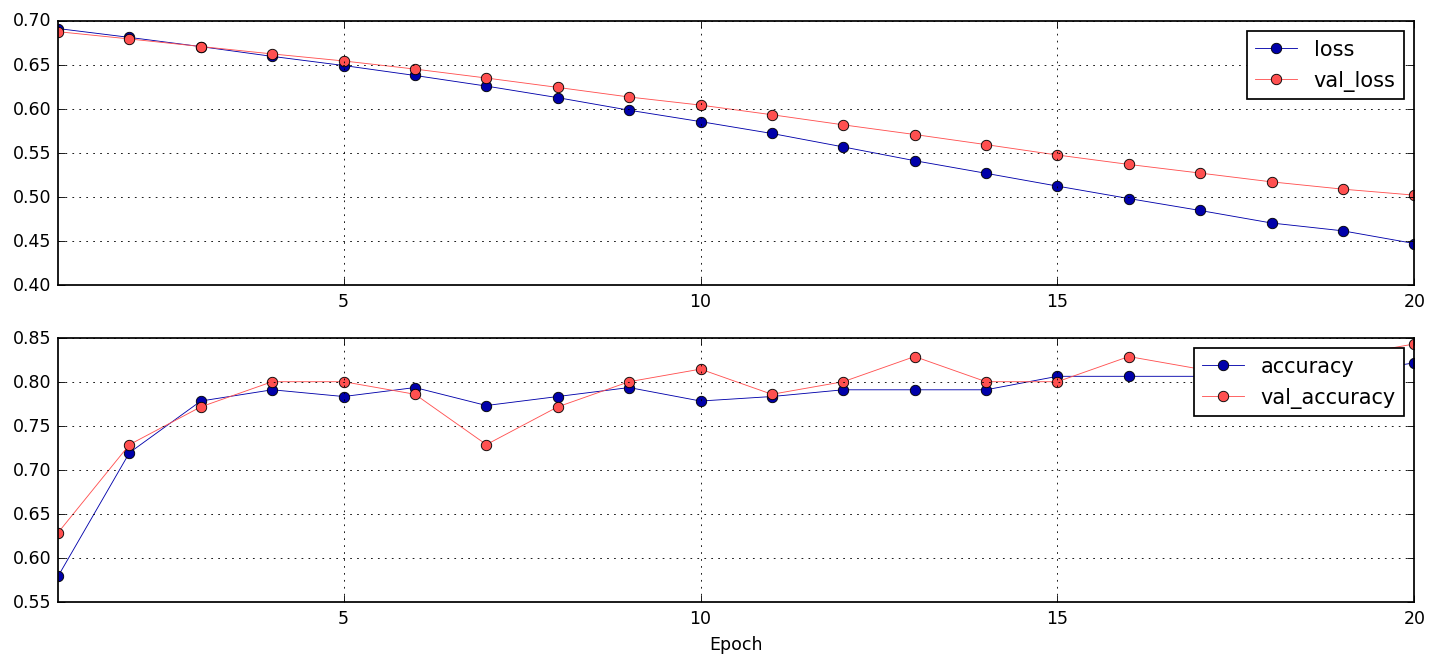

In [73]:
from keras import models
from keras import layers
aux=[] #arreglo que guardara las accuracy
aux2=[] #arreglo que guardara los valores de la func. loss
for i in range (10):
    #configuramos el primer modelo, el cual intaremos mejorar.
    a_model = models.Sequential()
    a_model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    a_model.add(layers.Dense(16, activation='relu'))
    a_model.add(layers.Dense(16, activation='relu'))
    a_model.add(layers.Dense(16, activation='relu'))
    a_model.add(layers.Dense(2, activation='sigmoid')) # softmax

    #Para ver resumen:
    #a_model.summary()

    ## Configuracion del compilador
    a_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #adam
    # a_model.compile(optimizer='rmsprop',
    #                       loss='binary_crossentropy', #categorical_crossentropy
    #                       metrics=['acc'])

    #fiteamos:
    a_model_hist = a_model.fit(x=X_train, y=y_train, validation_split=0.15,
                                           epochs=20,
                                           batch_size=50, verbose=0)

    #Veamos los resultados evaluando y graficando
    result = a_model.evaluate(X_test, y_test)
    print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))
    aux.append(result[1])
    aux2.append(result[0])
import statistics 
meanacc = statistics.mean(aux)
print('El accuracy promedio del modelo original fue: ', meanacc)
meanloss = statistics.mean(aux2)
print('El valor de la funcion de perdida promedio del modelo original fue: ', meanloss)
#Graficamos la ultima instancia para tener una idea general
plt.clf()   # clear figure
plot_history(a_model_hist, width=14)

### Resultados "originales"
En primer lugar cabe mencionar que se usaron parametros arbitrarios para generar una primera impresion del problema. Posteriormente se buscará a aquellos que entreguen el mejor resultado.

Focalizandose en los resultados expuestos, tras correr nuestro primer modelo 10 veces, se pudo notificar que el promedio de accuracy es aproximadamente ~81.2% (0.811616164445877), por otro lado observamos que la funcion de perdida entrega el valor aproximado de 0.463 (0.46263601183891295). Esta informacion sera nuestra base para la comparacion, donde el objetivo será alcanzar mejores metricas.

Por otro lado, a traves de los graficos se denota como 20 epocas pareceria no ser suficiente, puesto a que la curva de val_accuracy continua en aumento, es decir que no ha terminado de estabilizarse.

##### Apliquemos lo visto en clases:
Ya que el proceso de seleccion del mejor modelo puede ser tedioso, utilicemos la funcion definida en la clase 8 que involucra estimadores de Sklearn. Ya que asi usando GridSeachCV, podemos buscar el mejor parametro para la epoca, y la cantidad de unidades ocultas.

In [74]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="rmsprop", hidden_size=32):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)
param_grid = {'epochs': [1, 5, 10, 50, 70],  # epochs is fit parameter, not in make_model!
              'hidden_size': [8, 32, 64, 128, 256],
              'verbose' : [0], 'batch_size' : [10,40,70,100]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023597C4A3C8>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 40, 70, 100],
                         'epochs': [1, 5, 10, 50, 70],
                         'hidden_size': [8, 32, 64, 128, 256], 'verbose': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size", 'param_batch_size'],values=["mean_test_score", "std_test_score"])

mean_test_score  \
param_epochs param_hidden_size param_batch_size                    
1            8                 10                           0.69   
                               40                           0.60   
                               70                           0.52   
                               100                          0.53   
             32                10                           0.62   
...                                                          ...   
70           128               100                          0.84   
             256               10                           0.85   
                               40                           0.86   
                               70                           0.84   
                               100                          0.84   

                                                 std_test_score  
param_epochs param_hidden_size param_batch_size                  
1            8                 10                      1.16e-01  
                               40                      8.78e-02  
                               70                      8.33e-02  
                               100                     8.10e-03  
             32                10                      1.07e-01  
...                                                         ...  
70           128               100                     3.18e-02  
             256               10                      2.81e-02  
                               40                      1.33e-02  
                               70                      2.51e-02  
                               100                     2.92e-02  

[100 rows x 2 columns]

Observando la forma en que trabaja la busqueda de los mejores parametros se decide optar por que el size batch sea fijo con un valor de 32 (default). Esto debido a que, aumenta en gran medida el tiempo de ejecucion al tener que variar con [10,40,70,100] diferentes batch sizes, y asi mismo podemos notar que el desempeño del modelo no se ve afectado en gran medida por este parametro, si no que los determinantes son la cantidad de capas ocultas y la cantidad de unidades ocultas por capa.

De igual forma, para lograr encontrar el mejor modelo posible, se genera el siguiente codigo (el cual tarda aprox. 11 min en ser ejecutado). En este se varia el optimizador, la funcion de activacion para cada capa oculta y para la de salida, y además varia  la funcion de perdida. Cabe mencionar que para el GridSearch solo se usará la metrica de accuracy, ya que se establece que esta es la de mayor relevancia dentro del estudio.

In [80]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

for opti in ['rmsprop','adam']: #optimizadores
    for acti in ['relu','tanh']:# funcion de activacion capas
        for perd in ['binary_crossentropy','categorical_crossentropy']:#funcion de perdida
            for acti2 in ['sigmoid','softmax']: #funcion de activacion para capa de salida.
                def make_model(optimizer= opti, hidden_size=32):
                    model = models.Sequential()
                    model.add(layers.Dense(16, activation=acti, input_shape=(X_train.shape[1],)))
                    model.add(layers.Dense(16, activation=acti))
                    model.add(layers.Dense(16, activation=acti))
                    model.add(layers.Dense(16, activation=acti))
                    model.add(layers.Dense(2, activation=acti2))

                    model.compile(optimizer=opti,
                                  loss=perd,
                                  metrics=['accuracy'])
                    return model

                clf = KerasClassifier(make_model)
                param_grid = {'epochs': [1, 5, 10, 50, 70],  # Epocas a variar
                              'hidden_size': [8, 32, 64, 128, 256], #unidades por capa a variar
                              'verbose' : [0]}
                grid = GridSearchCV(clf, param_grid=param_grid, cv=3)
                grid.fit(X_train, y_train)
                print('El optimizador es: ', opti, 'La funcion de activacion para las capas es:', acti, 'La funcion de perdida usada es: ', perd, 'La funcion de activacion para la capa de salida es:', acti2,)
                print('\n')
                res = pd.DataFrame(grid.cv_results_)
                print(res.pivot_table(index=["param_epochs", "param_hidden_size"],values=["mean_test_score", "std_test_score"]))
                print('Luego el mejor escenario para esta convinacion de parametros es:')
                print('\n')
                print(res.loc[res.mean_test_score==res.mean_test_score.max(), ['param_epochs','param_hidden_size','mean_test_score']])

El optimizador es:  rmsprop La funcion de activacion para las capas es: relu La funcion de perdida usada es:  binary_crossentropy La funcion de activacion para la capa de salida es: sigmoid


                                mean_test_score  std_test_score
param_epochs param_hidden_size                                 
1            8                             0.60        1.19e-01
             32                            0.74        1.59e-02
             64                            0.56        4.93e-02
             128                           0.68        6.15e-02
             256                           0.61        1.00e-01
5            8                             0.72        1.11e-01
             32                            0.69        1.33e-01
             64                            0.82        2.12e-02
             128                           0.75        5.38e-02
             256                           0.72        5.67e-02
10           8                          

El optimizador es:  rmsprop La funcion de activacion para las capas es: tanh La funcion de perdida usada es:  binary_crossentropy La funcion de activacion para la capa de salida es: sigmoid


                                mean_test_score  std_test_score
param_epochs param_hidden_size                                 
1            8                             0.77        4.00e-02
             32                            0.67        9.95e-02
             64                            0.70        4.93e-02
             128                           0.63        1.00e-01
             256                           0.72        5.30e-03
5            8                             0.81        6.12e-03
             32                            0.81        6.12e-03
             64                            0.81        1.40e-02
             128                           0.83        2.14e-02
             256                           0.82        2.01e-02
10           8                          

El optimizador es:  adam La funcion de activacion para las capas es: relu La funcion de perdida usada es:  binary_crossentropy La funcion de activacion para la capa de salida es: sigmoid


                                mean_test_score  std_test_score
param_epochs param_hidden_size                                 
1            8                             0.59        4.51e-02
             32                            0.60        5.30e-02
             64                            0.67        7.87e-02
             128                           0.54        3.48e-02
             256                           0.52        4.01e-02
5            8                             0.65        1.06e-01
             32                            0.77        3.31e-02
             64                            0.74        5.52e-02
             128                           0.74        5.52e-02
             256                           0.68        7.69e-02
10           8                             

El optimizador es:  adam La funcion de activacion para las capas es: tanh La funcion de perdida usada es:  binary_crossentropy La funcion de activacion para la capa de salida es: sigmoid


                                mean_test_score  std_test_score
param_epochs param_hidden_size                                 
1            8                             0.71        3.71e-02
             32                            0.59        2.45e-02
             64                            0.63        9.29e-02
             128                           0.63        7.67e-02
             256                           0.61        7.82e-02
5            8                             0.81        2.67e-02
             32                            0.78        9.18e-03
             64                            0.82        1.86e-02
             128                           0.79        2.51e-02
             256                           0.79        3.71e-02
10           8                             

Vemos que la mejor accuracy es ~86% pero esta ocurre en diferentes configuraciones del modelo, por lo que para decidir cual es la mejor nos fijamos en el std, que representa que tan dispersos estan nuestros resultados, es asi como se escoge la configuracion con optimizador 'adam', activacion para las capas ocultas 'tanh', activacion para la ultima capa 'softmax', y con funcion de perdida 'binary_crossentropy', con 70 epocas, 64 unidades ocultas por capa, debido a que posee el valor mas bajo de std entre los candidatos con ~86% de accuracy con un valor de: 9.18e-03, por lo que la dispersion de los datos es sumamente baja.

Se usara este modelo para continuar experimentando en la busqueda del mejor resultado posible, y con el cual se obtendran ademas las metricas de AUC, F1-Score.

La primera modificamos que se realiza es reducir el batch size, es decir pasar de 32 (default) a 10, debido a que en las primeras instancias se notaba que al reducir el batch size mejoraba el puntaje. Sin embargo esto no ocurre para este caso, ya que se obtiene: 0.8469696938991547 de accuracy con batch size 10 y con 32 se obtiene: 0.848484855890274, ademas vemos que la estabilidad en la val_accuracy se alcanza y mantiene mejor en para el caso con 32 de batch size.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
7/7 [==============================] - 0s 997us/step - loss: 0.3831 - accuracy: 0.8434 - auc: 0.9130 - precision: 0.8434 - recall: 0.8434
Loss: 0.3831, Accuracy:  0.8434, AUC:  0.9130, F1-Score:  0.8434
7/7 [==============================] - 0s 999us/step - loss: 0.3738 - accuracy: 0.8485 - auc: 0.9130 - precision: 0.8485 - recall: 0.8485
Loss: 0.3738, Accuracy:  0.8485, AUC:  0.9130, F1-Score:  0.8485
7/7 [==============================] - 0s 997us/step - loss: 0.3695 - accuracy: 0.8434 - auc: 0.9170 - precision: 0.8434 - recall: 0.8434
Loss: 0.3695, Accuracy:  0.8434, AUC:  0.9170, F1-Score:  0.8434
7/7 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8485 - auc: 0.9139 - precision: 0.8485 - recall: 0.8485
Loss: 0.3726, Accuracy:  0.8485, AUC:  0.9139, F1-Score:  0.8485
7/7 [==============================] - 0s 999us/step - loss: 0.3749 - accuracy: 0.8333 - auc: 0.9119 - precis

<Figure size 750x500 with 0 Axes>

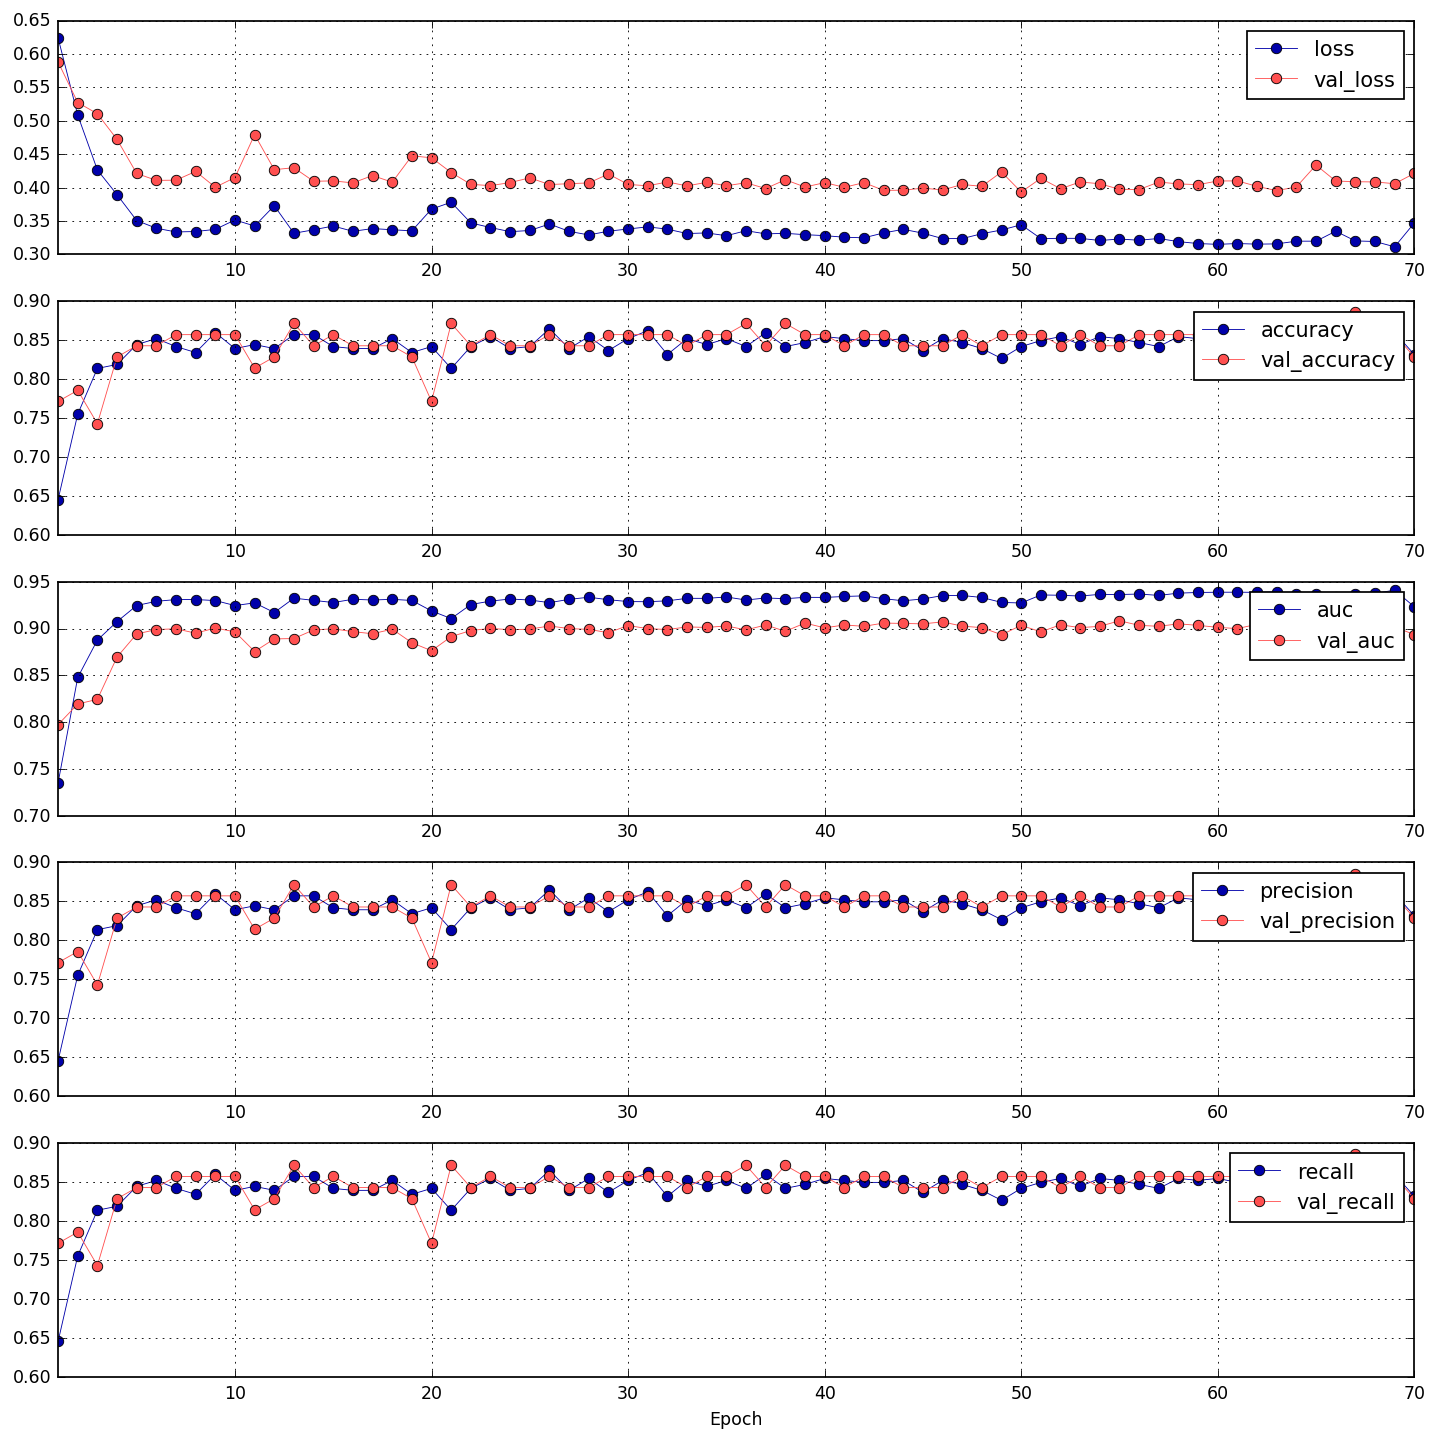

In [77]:
from keras import models
from keras import layers
aux=[] #arreglo que guardara las accuracy
aux2=[] #arreglo que guardara los valores de la func. loss
aux3=[] #arreglo que guarda los valores de AUC
aux4=[] #arreglo que guarda los valores de F1-Score
for i in range (10):
    #configuramos el primer modelo, el cual intaremos mejorar.
    a_model = models.Sequential()
    a_model.add(layers.Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
    a_model.add(layers.Dense(64, activation='tanh'))
    a_model.add(layers.Dense(64, activation='tanh'))
    a_model.add(layers.Dense(64, activation='tanh'))
    a_model.add(layers.Dense(2, activation='softmax'))

    #Para ver resumen:
    #a_model.summary()

    ## Configuracion del compilador
    a_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC','Precision','Recall']) #adam


    #fiteamos:
    a_model_hist = a_model.fit(x=X_train, y=y_train, validation_split=0.15,
                                           epochs=70,
                                           batch_size=32, verbose=0) #Se testeo con 10 de batch_size

    #Veamos los resultados evaluando y graficando
    result = a_model.evaluate(X_test, y_test)
    print("Loss: {:.4f}, Accuracy:  {:.4f}, AUC:  {:.4f}, F1-Score:  {:.4f}".format(*result)) #notar que podemos usar f1 score, tomando el valor de precision, pues en estos casos precision==recall
    aux.append(result[1])
    aux2.append(result[0])
    aux3.append(result[2])
    aux4.append(result[3])
#Saquemos las medias de las 10 iteraciones, ya que como sabemos cada vez que se ejecuta el codigo los resultados varian.
import statistics 
meanacc = statistics.mean(aux)
print('El accuracy promedio del modelo mejorado fue: ', meanacc)
meanloss = statistics.mean(aux2)
print('El valor de la funcion de perdida promedio del modelo mejorado fue: ', meanloss)
meanauc = statistics.mean(aux3)
print('El AUC promedio del modelo mejorado fue: ', meanauc)
meanf1 = statistics.mean(aux4)
print('El F1-Score promedio del modelo mejorado fue: ', meanf1)
#Graficamos la ultima instancia para tener una idea general
plt.clf()   # clear figure
plot_history(a_model_hist, width=14, height=14)

Ahora por ultimo intentemos variar la cantidad de capas ocultas, el modelo desde un comienzo lo planteamos con 4 capas, por lo que ahora testearemos su desempeño con 3. Vemos que los resultados practicamente no se ven alterados, ya que el accuracy promedio alcanzado es de 0.8484848439693451, lo cual es una disminucion de 0.0000000119209289 (0.00000119209289%) al reducir una capa.

Es por este motivo que se decide reducir otra capa, es decir dejar el modelo con solo 2 capas ocultas, el accuracy promedio obtenido 0.8469697058200836, sin embargo aqui ya existe una disminucion "significativa" de 0.15%. 

7/7 [==============================] - 0s 857us/step - loss: 0.3890 - accuracy: 0.8535 - auc: 0.9080 - precision: 0.8535 - recall: 0.8535
Loss: 0.3890, Accuracy:  0.8535, AUC:  0.9080, F1-Score:  0.8535
7/7 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8535 - auc: 0.9092 - precision: 0.8535 - recall: 0.8535
Loss: 0.3901, Accuracy:  0.8535, AUC:  0.9092, F1-Score:  0.8535
7/7 [==============================] - 0s 996us/step - loss: 0.3867 - accuracy: 0.8535 - auc: 0.9083 - precision: 0.8535 - recall: 0.8535
Loss: 0.3867, Accuracy:  0.8535, AUC:  0.9083, F1-Score:  0.8535
7/7 [==============================] - 0s 998us/step - loss: 0.3844 - accuracy: 0.8485 - auc: 0.9100 - precision: 0.8485 - recall: 0.8485
Loss: 0.3844, Accuracy:  0.8485, AUC:  0.9100, F1-Score:  0.8485
7/7 [==============================] - 0s 853us/step - loss: 0.3850 - accuracy: 0.8434 - auc: 0.9090 - precision: 0.8434 - recall: 0.8434
Loss: 0.3850, Accuracy:  0.8434, AUC:  0.9090, F1-Sc

<Figure size 750x500 with 0 Axes>

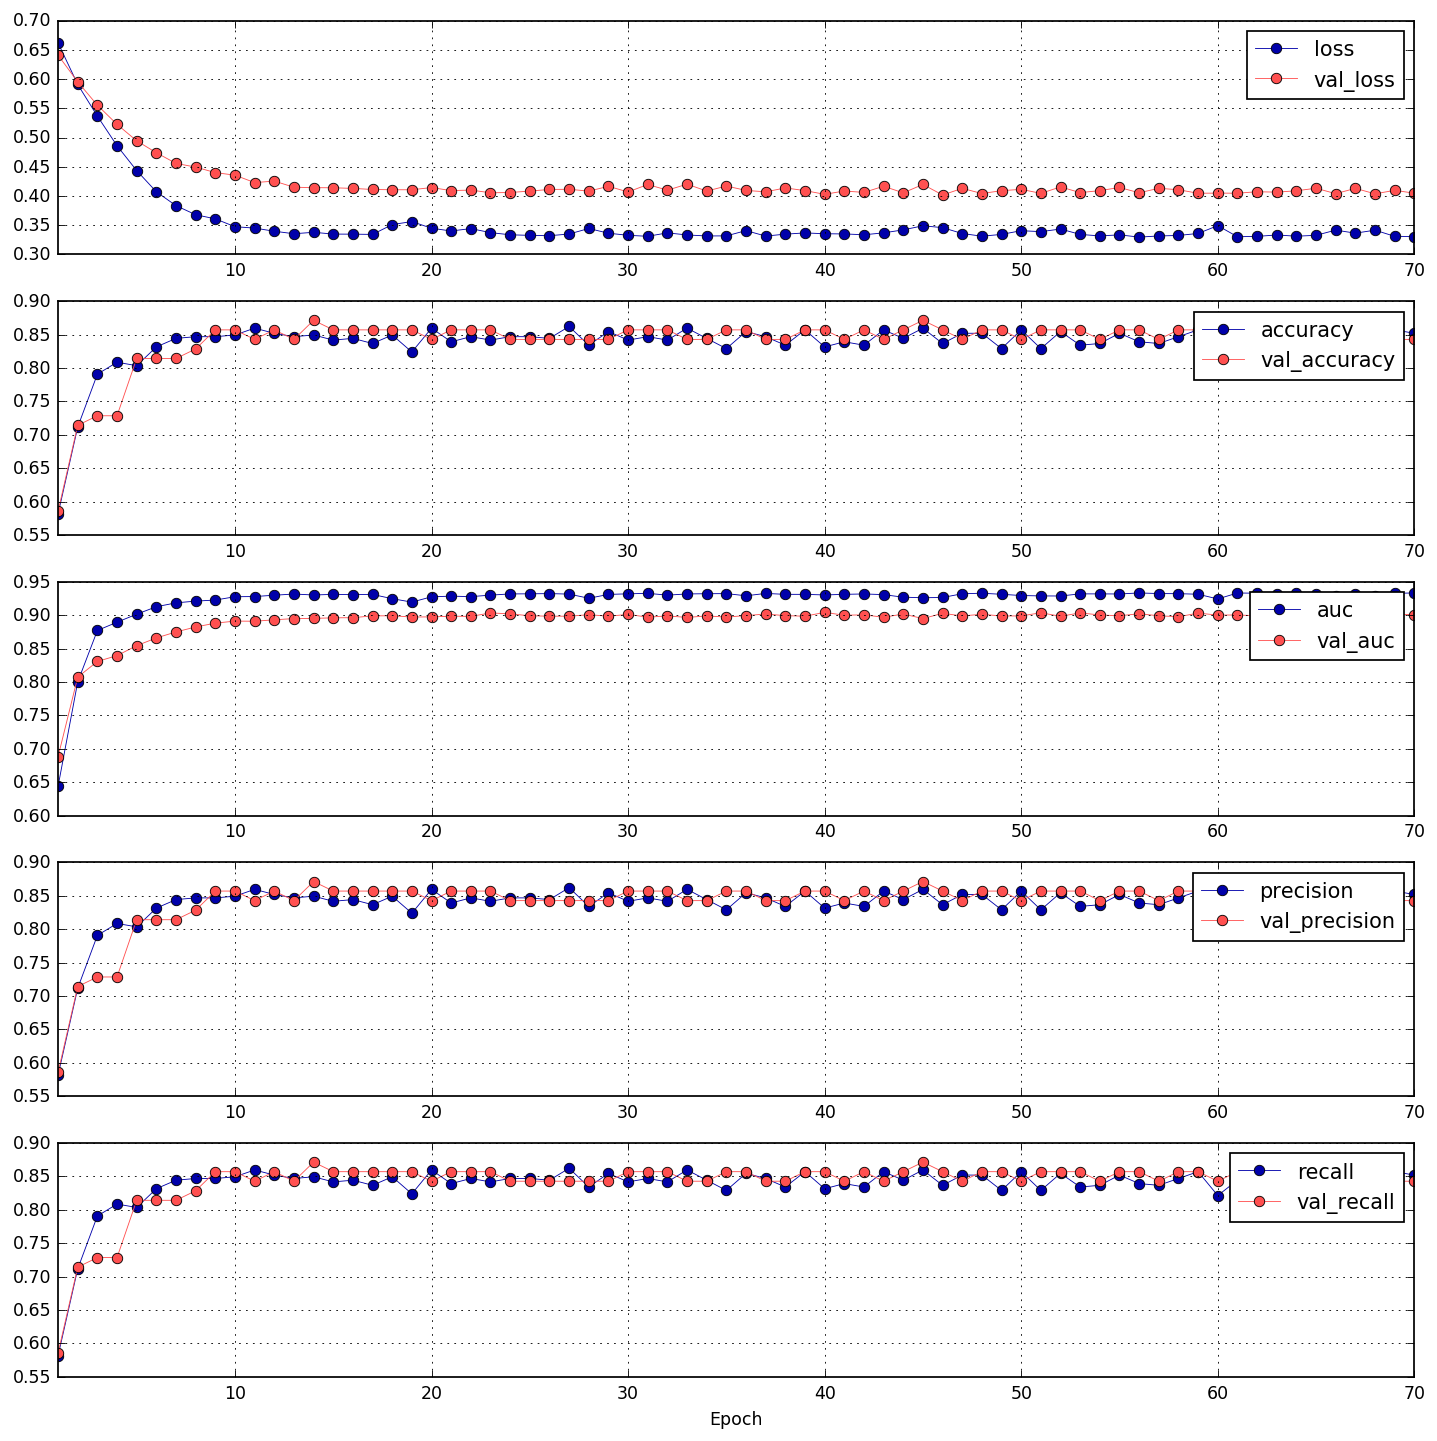

In [78]:
from keras import models
from keras import layers
aux=[] #arreglo que guardara las accuracy
aux2=[] #arreglo que guardara los valores de la func. loss
aux3=[] #arreglo que guarda los valores de AUC
aux4=[] #arreglo que guarda los valores de F1-Score
for i in range (10): # se corre 10 veces para asi obtener un promedio, ya que en cada ejecucion el resultado varia.
    a_model = models.Sequential()
    a_model.add(layers.Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
    a_model.add(layers.Dense(64, activation='tanh'))
    a_model.add(layers.Dense(2, activation='softmax'))

    #Para ver resumen:
    #a_model.summary()

    ## Configuracion del compilador
    a_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC','Precision','Recall'])


    #fiteamos:
    a_model_hist = a_model.fit(x=X_train, y=y_train, validation_split=0.15,
                                           epochs=70,
                                           batch_size=32, verbose=0)

    #Veamos los resultados evaluando y graficando
    result = a_model.evaluate(X_test, y_test)
    print("Loss: {:.4f}, Accuracy:  {:.4f}, AUC:  {:.4f}, F1-Score:  {:.4f}".format(*result)) #notar que podemos usar f1 score, tomando el valor de precision, pues en estos casos precision==recall
    aux.append(result[1])
    aux2.append(result[0])
    aux3.append(result[2])
    aux4.append(result[3])
#Saquemos las medias de las 10 iteraciones, ya que como sabemos cada vez que se ejecuta el codigo los resultados varian.
import statistics 
meanacc = statistics.mean(aux)
print('El accuracy promedio del modelo mejorado fue: ', meanacc)
meanloss = statistics.mean(aux2)
print('El valor de la funcion de perdida promedio del modelo mejorado fue: ', meanloss)
meanauc = statistics.mean(aux3)
print('El AUC promedio del modelo mejorado fue: ', meanauc)
meanf1 = statistics.mean(aux4)
print('El F1-Score promedio del modelo mejorado fue: ', meanf1)
#Graficamos la ultima instancia para tener una idea general
plt.clf()   # clear figure
plot_history(a_model_hist, width=14, height=14)

Tras tener esta informacion se opta por dejar el modelo con 3 capas ocultas, ya que existe una reduccion en gasto computacional.

Siendo el siguiente modelo, el modelo final:

7/7 [==============================] - 0s 997us/step - loss: 0.3774 - accuracy: 0.8384 - auc: 0.9121 - precision: 0.8384 - recall: 0.8384
Loss: 0.3774, Accuracy:  0.8384, AUC:  0.9121, F1-Score:  0.8384
7/7 [==============================] - 0s 857us/step - loss: 0.3746 - accuracy: 0.8535 - auc: 0.9114 - precision: 0.8535 - recall: 0.8535
Loss: 0.3746, Accuracy:  0.8535, AUC:  0.9114, F1-Score:  0.8535
7/7 [==============================] - 0s 855us/step - loss: 0.3796 - accuracy: 0.8535 - auc: 0.9111 - precision: 0.8535 - recall: 0.8535
Loss: 0.3796, Accuracy:  0.8535, AUC:  0.9111, F1-Score:  0.8535
7/7 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8535 - auc: 0.9078 - precision: 0.8535 - recall: 0.8535
Loss: 0.3845, Accuracy:  0.8535, AUC:  0.9078, F1-Score:  0.8535
7/7 [==============================] - 0s 997us/step - loss: 0.3815 - accuracy: 0.8434 - auc: 0.9085 - precision: 0.8434 - recall: 0.8434
Loss: 0.3815, Accuracy:  0.8434, AUC:  0.9085, F1-Sc

<Figure size 750x500 with 0 Axes>

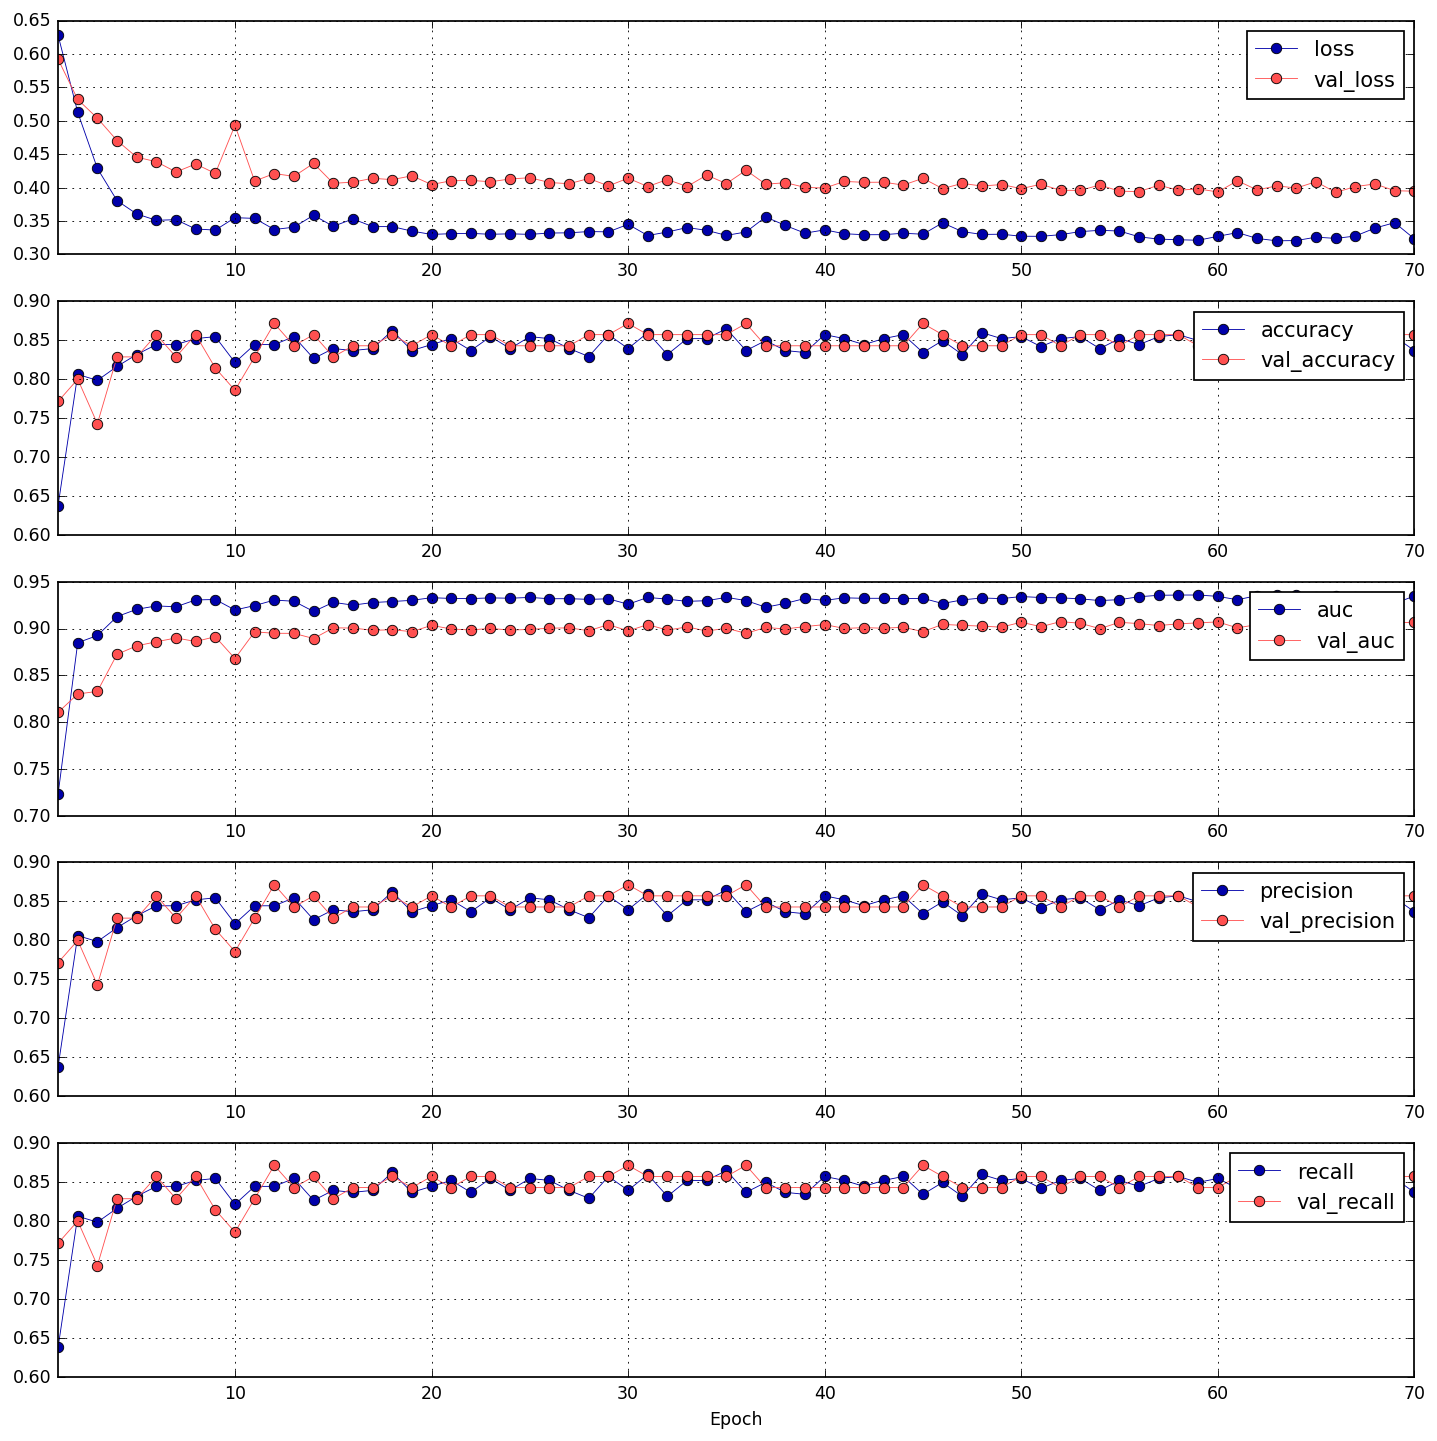

In [79]:
from keras import models
from keras import layers
aux=[] #arreglo que guardara las accuracy
aux2=[] #arreglo que guardara los valores de la func. loss
aux3=[] #arreglo que guarda los valores de AUC
aux4=[] #arreglo que guarda los valores de F1-Score
for i in range (10): # se corre 10 veces para asi obtener un promedio, ya que en cada ejecucion el resultado varia.
    a_model = models.Sequential()
    a_model.add(layers.Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
    a_model.add(layers.Dense(64, activation='tanh'))
    a_model.add(layers.Dense(64, activation='tanh'))
    a_model.add(layers.Dense(2, activation='softmax'))

    #Para ver resumen:
    #a_model.summary()

    ## Configuracion del compilador
    a_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC','Precision','Recall'])


    #fiteamos:
    a_model_hist = a_model.fit(x=X_train, y=y_train, validation_split=0.15,
                                           epochs=70,
                                           batch_size=32, verbose=0)

    #Veamos los resultados evaluando y graficando
    result = a_model.evaluate(X_test, y_test)
    print("Loss: {:.4f}, Accuracy:  {:.4f}, AUC:  {:.4f}, F1-Score:  {:.4f}".format(*result)) #notar que podemos usar f1 score, tomando el valor de precision, pues en estos casos precision==recall
    aux.append(result[1])
    aux2.append(result[0])
    aux3.append(result[2])
    aux4.append(result[3])
#Saquemos las medias de las 10 iteraciones, ya que como sabemos cada vez que se ejecuta el codigo los resultados varian.
import statistics 
meanacc = statistics.mean(aux)
print('El accuracy promedio del modelo mejorado fue: ', meanacc)
meanloss = statistics.mean(aux2)
print('El valor de la funcion de perdida promedio del modelo mejorado fue: ', meanloss)
meanauc = statistics.mean(aux3)
print('El AUC promedio del modelo mejorado fue: ', meanauc)
meanf1 = statistics.mean(aux4)
print('El F1-Score promedio del modelo mejorado fue: ', meanf1)
#Graficamos la ultima instancia para tener una idea general
plt.clf()   # clear figure
plot_history(a_model_hist, width=14, height=14)

### Conclusiones finales:

Finalmente el modelo  se compone de la manera previamente expuesta, donde contiene 3 capas ocultas con 64 unidades cada una, usa activacion tanh, y softmax para la salida. Ademas de optimizador adam, funcion de perdida binary_crossentropy, 70 epocas y un batch size default de 32.

En primer lugar observando la información gráfica de val_accuracy, con el objetivo de comparar con el modelo original, notamos que para este escenario mejorado el modelo se estabiliza a partir de la epoca 17, en cambio en el caso original esto mo lograba clarificarse pues continuaba en ascenso en las epocas finales.

Ya centrandose en los resultados obtenidos, observamos un accuracy promedio de ~84.6% lo cual significa una mejoria de aproximadamente 3.2% en el porcentaje de clasificaciones correctas con respecto al primer modelo propuesto.

Pero como se tiene conocimiento el accuracy no es la unica metrica que otorga valor a un modelo, es ahi donde toman papel la metrica de F1 Score, debido a que esta utilizando la precision y el recall logra considerar aquellas ocasiones donde ocurren falsos positivos y falsos negativos, esto es de suma relevancia para escenarios como el que se esta estudiando, debido a que si un agente de ventas no alcanza su meta, pero se predice que sí lo hara, no tiene el mismo costo que predecir que no llegará pero sí llega. Este modelo entrega un F1-Score promedio de ~84.6%, lo cual es un buen indicador.

De igual manera este modelo se respalda en su puntaje de AUC promedio que toma el valor de:  ~0.91. Este valor corresponde a que tan bien distingue entre una clase y la otra, es decir que tan bien clasifica a un agente que no logrará llegar a la meta y que realmente no llega, y vice versa. Entre más cercano a 1 el valor obtenido mejor el desempeño del modelo, es así como se establece que esta metrica respalda el buen desempeño del modelo elavorado pues se acerca bastante a 1.

Por ultimo y con el objetivo de comparar con el primer modelo propuesto, observamos que el valor promedio de la funcion de perdida ha disminuido en 0.08247 aproximadamente (0.46263601183891295- 0.38016484677791595), lo cual es una mejoria ya que se acerca aun más a 0.

Es asi como se concluye que este modelo es un buen candidato para solucionar el problema presentando, pues presenta buenas metricas que los respaldan, pero se recomienda realizar más experimentacion, ya que puede ser que modelos predictivos fuera del area de las redes neuronales tengan un mejor desempeño, ya que como se mencionó el mejor modelo siempre dependerá del problema.

## Suerte!

Gracias! 